In [ ]:
import pandas as pd
df = pd.read_csv('General_Education_School.csv')
print(df.shape)
print(df.columns)
print(df.dtypes)
df.head()


(1671, 10)
Index(['DBN', 'School Name', 'School Type', 'Parent Response Rate',
       'Teacher Response Rate', 'Student Response Rate',
       'Total Safety and Respect Score', 'Total Communication Score',
       'Total Engagement Score', 'Total Academic Expectations Score'],
      dtype='object')
DBN                                  object
School Name                          object
School Type                          object
Parent Response Rate                 object
Teacher Response Rate                object
Student Response Rate                object
Total Safety and Respect Score       object
Total Communication Score            object
Total Engagement Score               object
Total Academic Expectations Score    object
dtype: object


,DBN,School Name,School Type,Parent Response Rate,Teacher Response Rate,Student Response Rate,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
0,dbn,locationname,NaN,rr_p,rr_t,rr_s,saf_tot_12,com_tot_12,eng_tot_12,aca_tot_12
1,01M015,P.S. 015 Roberto Clemente,Elementary School,61%,92%,NaN,8.4,8.2,8.3,8.2
2,01M019,P.S. 019 Asher Levy,Elementary School,92%,94%,NaN,8.4,8,8,8.2
3,01M020,P.S. 020 Anna Silver,Elementary School,88%,73%,NaN,8.5,7.8,8.2,8.2
4,01M034,P.S. 034 Franklin D. Roosevelt,Elementary/Middle School,39%,58%,96%,7.3,6.9,7.3,7.7


In [ ]:
#dele the first row becuase it contains a repeated info
df = df.drop(index=0).reset_index(drop=True)

In [ ]:
#convert the percent values into numerical values
for col in ['Parent Response Rate', 'Teacher Response Rate', 'Student Response Rate']:
    df[col] = df[col].str.replace('%', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
#convert the objects into numrical values
score_columns = [
    'Total Safety and Respect Score',
    'Total Communication Score',
    'Total Engagement Score',
    'Total Academic Expectations Score'
]
df[score_columns] = df[score_columns].apply(pd.to_numeric, errors='coerce')


In [ ]:
#cal the null values
print(df.isnull().sum())


DBN                                    0
School Name                            0
School Type                            0
Parent Response Rate                   0
Teacher Response Rate                  0
Student Response Rate                675
Total Safety and Respect Score         0
Total Communication Score              0
Total Engagement Score                 0
Total Academic Expectations Score      0
dtype: int64


In [ ]:
print(df.shape)
print(df.columns)
print(df.dtypes)
df.head()

(1670, 10)
Index(['DBN', 'School Name', 'School Type', 'Parent Response Rate',
       'Teacher Response Rate', 'Student Response Rate',
       'Total Safety and Respect Score', 'Total Communication Score',
       'Total Engagement Score', 'Total Academic Expectations Score'],
      dtype='object')
DBN                                   object
School Name                           object
School Type                           object
Parent Response Rate                   int64
Teacher Response Rate                  int64
Student Response Rate                float64
Total Safety and Respect Score       float64
Total Communication Score            float64
Total Engagement Score               float64
Total Academic Expectations Score    float64
dtype: object


,DBN,School Name,School Type,Parent Response Rate,Teacher Response Rate,Student Response Rate,Total Safety and Respect Score,Total Communication Score,Total Engagement Score,Total Academic Expectations Score
0,01M015,P.S. 015 Roberto Clemente,Elementary School,61,92,NaN,8.4,8.2,8.3,8.2
1,01M019,P.S. 019 Asher Levy,Elementary School,92,94,NaN,8.4,8.0,8.0,8.2
2,01M020,P.S. 020 Anna Silver,Elementary School,88,73,NaN,8.5,7.8,8.2,8.2
3,01M034,P.S. 034 Franklin D. Roosevelt,Elementary/Middle School,39,58,96.0,7.3,6.9,7.3,7.7
4,01M063,P.S. 063 William Mckinley,Elementary School,58,100,NaN,8.5,7.4,7.6,7.8


2.after we cleaned the data we will start analyizing data 

In [ ]:
#study the correlation between the fetures 
correlation = df.corr(numeric_only=True)
print(correlation)


                                   Parent Response Rate  \
Parent Response Rate                           1.000000   
Teacher Response Rate                          0.313786   
Student Response Rate                          0.553581   
Total Safety and Respect Score                 0.499228   
Total Communication Score                      0.476736   
Total Engagement Score                         0.455845   
Total Academic Expectations Score              0.423578   

                                   Teacher Response Rate  \
Parent Response Rate                            0.313786   
Teacher Response Rate                           1.000000   
Student Response Rate                           0.263486   
Total Safety and Respect Score                  0.218922   
Total Communication Score                       0.274939   
Total Engagement Score                          0.271420   
Total Academic Expectations Score               0.285595   

                                   Student Res

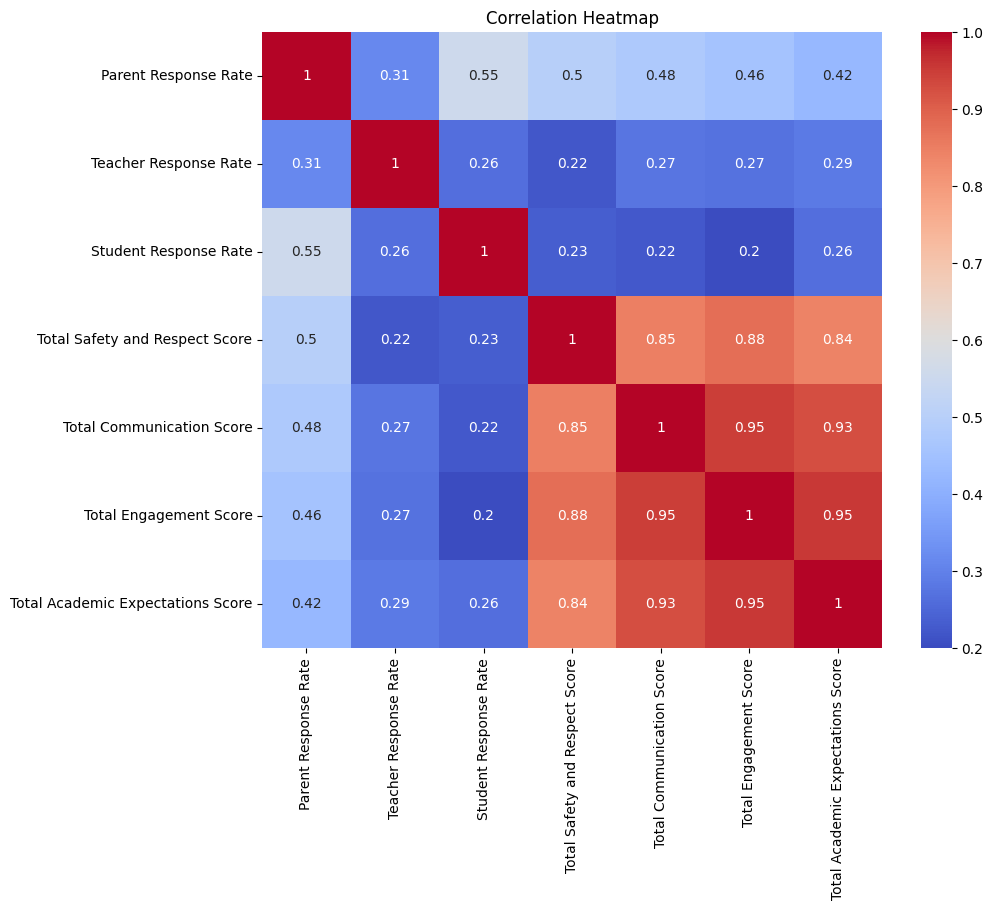

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
#find the higher Total Academic Expectations Score by the type
avg_academic_expectation = df.groupby('School Type')['Total Academic Expectations Score'].mean().sort_values(ascending=False)
print(avg_academic_expectation)


School Type
YABC                             8.368182
Early Childhood School           8.360241
Elementary School                8.051053
Transfer High School             8.044898
Elementary/Middle School         7.961250
Middle School                    7.807167
High School                      7.530966
Middle/High School               7.514943
Elementary/Middle/High School    7.514286
Name: Total Academic Expectations Score, dtype: float64


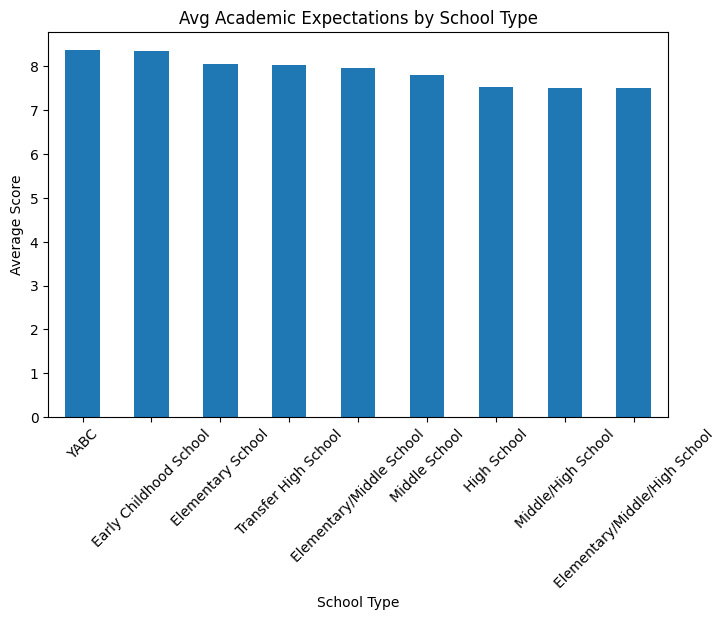

In [ ]:
avg_academic_expectation.plot(kind='bar', title='Avg Academic Expectations by School Type', figsize=(8,5))
plt.ylabel('Average Score')
plt.xlabel('School Type')
plt.xticks(rotation=45)
plt.show()


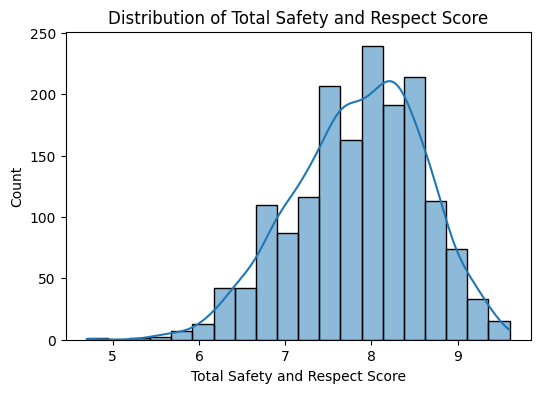

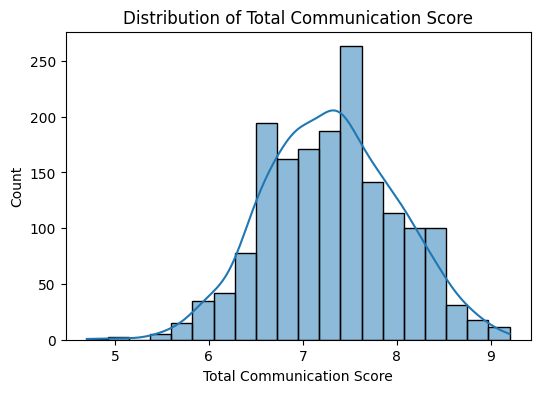

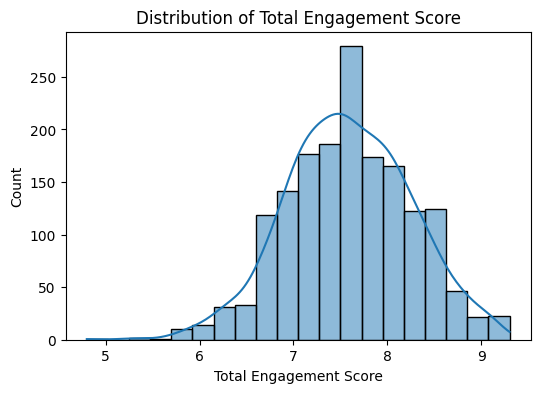

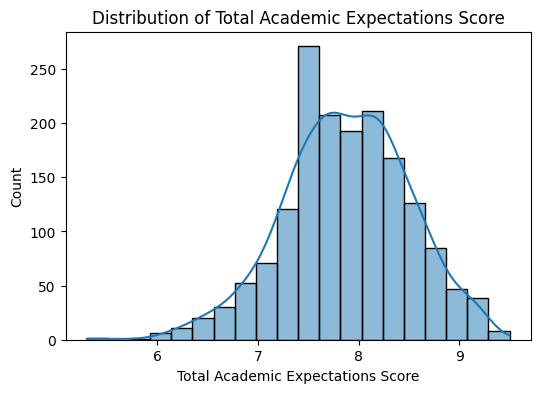

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in score_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [ ]:
#find the average score for each school 
df['Average Score'] = df[score_columns].mean(axis=1)
top_schools = df[['School Name', 'Average Score']].sort_values(by='Average Score', ascending=False).head(50)
print(top_schools)


NameError: name 'df' is not defined

In [ ]:
low_schools = df[df['Average Score'] < 7][['School Name', 'Average Score']]
print(low_schools.sort_values(by='Average Score'))


                                            School Name  Average Score
829              The Brooklyn Academy Of Global Finance          4.875
242   Academy For Social Action: A College Board School          5.425
164                   Manhattan Theatre Lab High School          5.500
901                   Brooklyn Theatre Arts High School          5.750
1294                          Beach Channel High School          5.850
...                                                 ...            ...
1315                        P.S. 140 Edward K Ellington          6.975
184      Frederick Douglass Academy Ii Secondary School          6.975
84                            Business Of Sports School          6.975
1202                               Flushing High School          6.975
1525  Bushwick Leaders High School For Academic Exce...          6.975

[252 rows x 2 columns]


In [ ]:
# Correlation between response rates and scores
response_columns = ['Parent Response Rate', 'Teacher Response Rate', 'Student Response Rate']
score_columns = ['Total Safety and Respect Score', 'Total Communication Score',
                 'Total Engagement Score', 'Total Academic Expectations Score']

correlation = df[response_columns + score_columns].corr()
print(correlation.loc[response_columns, score_columns])  # Show only relevant correlations


                       Total Safety and Respect Score  \
Parent Response Rate                         0.499228   
Teacher Response Rate                        0.218922   
Student Response Rate                        0.233698   

                       Total Communication Score  Total Engagement Score  \
Parent Response Rate                    0.476736                0.455845   
Teacher Response Rate                   0.274939                0.271420   
Student Response Rate                   0.224495                0.199669   

                       Total Academic Expectations Score  
Parent Response Rate                            0.423578  
Teacher Response Rate                           0.285595  
Student Response Rate                           0.263756  


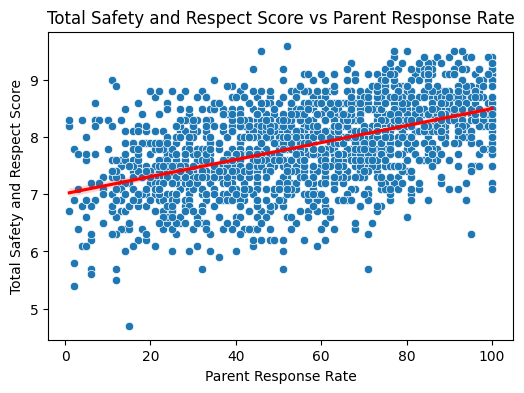

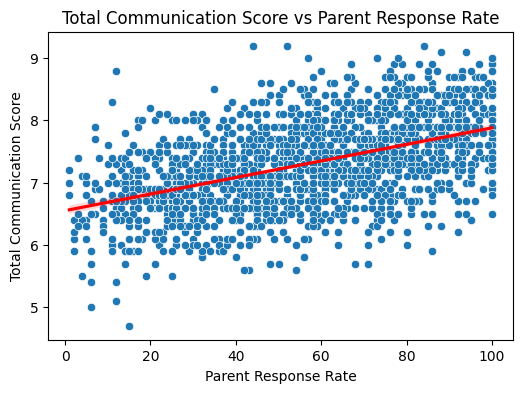

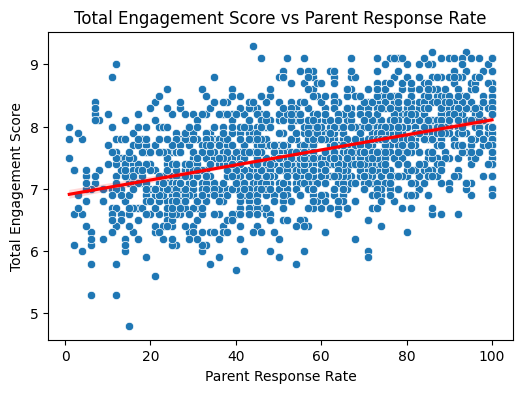

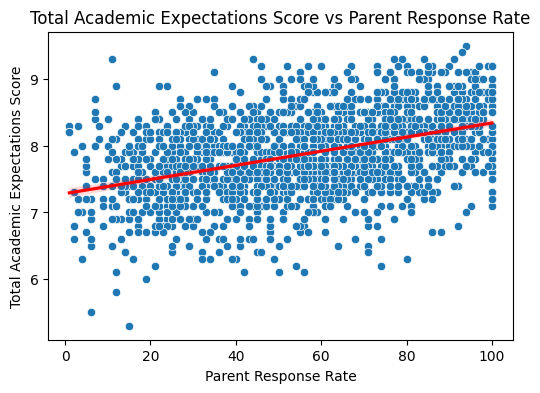

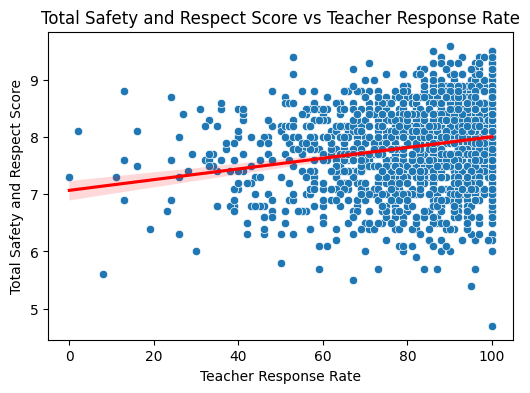

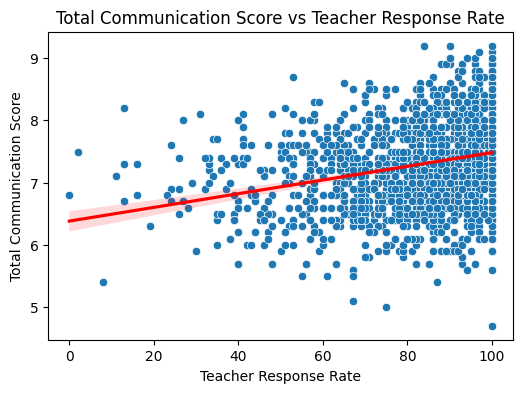

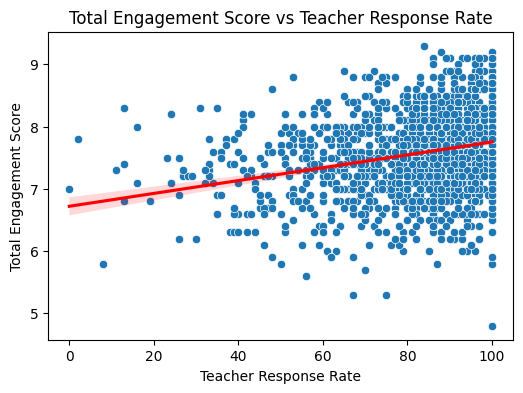

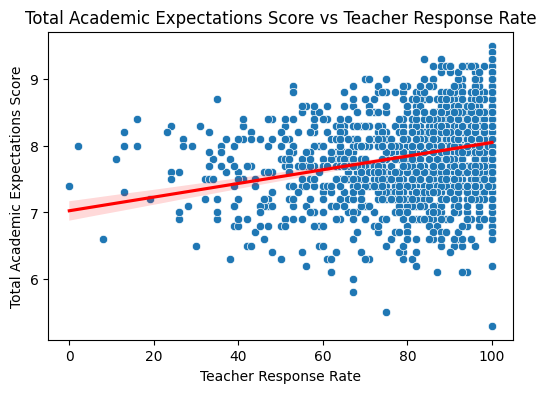

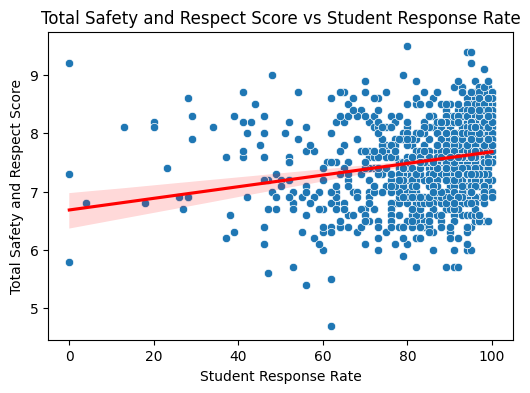

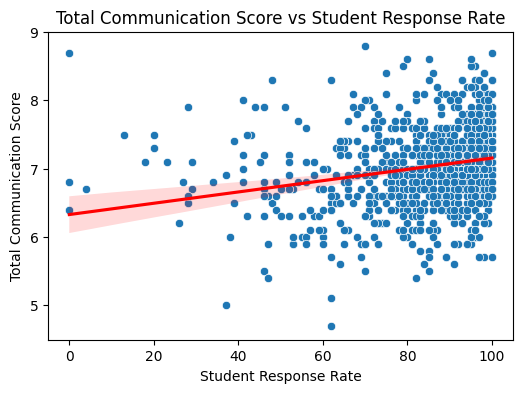

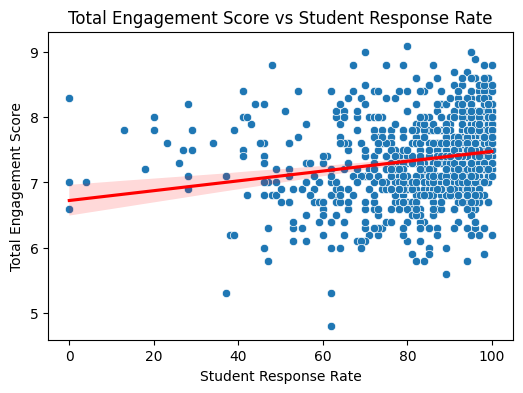

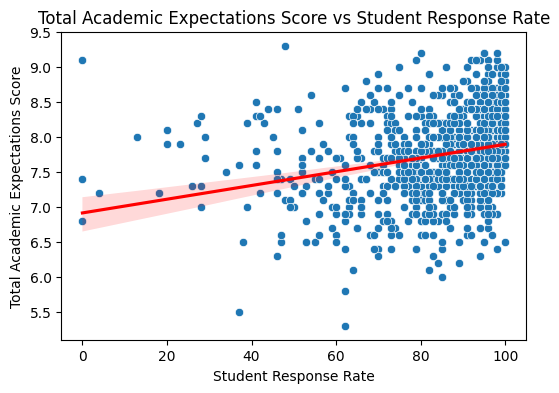

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for resp_col in response_columns:
    for score_col in score_columns:
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[resp_col], y=df[score_col])
        sns.regplot(x=df[resp_col], y=df[score_col], scatter=False, color='red')  # Regression line
        plt.title(f'{score_col} vs {resp_col}')
        plt.xlabel(resp_col)
        plt.ylabel(score_col)
        plt.show()


In [ ]:
#Which school types (Elementary, Middle, High) have the best scores?
df['School Type'].value_counts()


School Type
Elementary School                617
High School                      352
Middle School                    293
Elementary/Middle School         160
Middle/High School                87
Early Childhood School            83
Transfer High School              49
YABC                              22
Elementary/Middle/High School      7
Name: count, dtype: int64

In [ ]:
# Average scores by school type
type_scores = df.groupby('School Type')[score_columns].mean().sort_values(by='Total Academic Expectations Score', ascending=False)
print(type_scores)


                               Total Safety and Respect Score  \
School Type                                                     
YABC                                                 8.377273   
Early Childhood School                               8.615663   
Elementary School                                    8.273906   
Transfer High School                                 8.091837   
Elementary/Middle School                             7.661250   
Middle School                                        7.455290   
High School                                          7.394886   
Middle/High School                                   7.398851   
Elementary/Middle/High School                        7.471429   

                               Total Communication Score  \
School Type                                                
YABC                                            7.700000   
Early Childhood School                          8.004819   
Elementary School                           